• **DOMAIN:** Digital content management

• **CONTEXT:** Classification is probably the most popular task that you would deal with in real life. Text in the form of
blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer
without knowing about him/her. We are going to create a classifier that predicts multiple features of the author
of a given text. We have designed it as a Multi label classification problem.

• **DATA DESCRIPTION:** Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus
consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus
incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words
per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the
blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for
many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age
groups:
- 8240 "10s" blogs (ages 13-17)
- 8086 "20s" blogs(ages 23-27)
- 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been
stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following
post and links within a post are denoted by the label url link.

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

• **PROJECT OBJECTIVE:** The need is to build a NLP classifier which can use input text parameters to determine the label/s of of the blog.
Steps and tasks:

1. Import and analyse the data set.
2. Perform data pre-processing on the data:
• Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
• Target/label merger and transformation
• Train and test split
• Vectorisation, etc.
3. Design, train, tune and test the best text classifier.
4. Display and explain detail the classification report
5. Print the true vs predicted labels for any 5 entries from the dataset.

**Hint:** The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and
experimental here in trying new approaches to design the best model.

#1. Import and analyse the data set.

## Importing Libraries

**Let us start by mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

import re # regular expression
import nltk # nltk is Natural Language processing toolkit

**Setting Options**

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## Read Data

In [4]:
# Importing blogtext.csv into a pandas dataframe
blogtext_df = pd.read_csv('/content/drive/MyDrive/blogtext.csv')
#Checking the shape of DF
blogtext_df.shape

(681284, 7)

**There are 681284 records in the dataset with 7 columns/features**

In [5]:
#Checking top two rows of DF to get an overview of the dataset
blogtext_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
blogtext_df.describe(include='O')

,gender,topic,sign,date,text
count,681284,681284,681284,681284,681284
unique,2,40,12,2616,611652
top,male,indUnk,Cancer,"02,August,2004",urlLink
freq,345193,251015,65048,16544,445


**Most of the posts are by male.There are 40 unique topics from which most popular one is indUnk.Most of the post are by the person of Cancer zodiac sign**

In [7]:
blogtext_df.describe()

,id,age
count,681284.0000000,681284.0000000
mean,2397802.4033956,23.9323263
std,1247722.7013254,7.7860087
min,5114.0000000,13.0000000
25%,1239610.0000000,17.0000000
50%,2607577.0000000,24.0000000
75%,3525660.0000000,26.0000000
max,4337650.0000000,48.0000000


**Age of the bloggers are between 13 to 48 years. 50% of the bloggers are between age 13 to 23.**

## Perform EDA on Data

In [8]:
#Checking for null values in dataset
blogtext_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

**There are no null values present in the dataset**

In [9]:
#Checking the datatypes of the features
blogtext_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


**Age and id are of int64 rest all the features are of object type**

In [10]:
#Value counts for gender column
blogtext_df['gender'].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

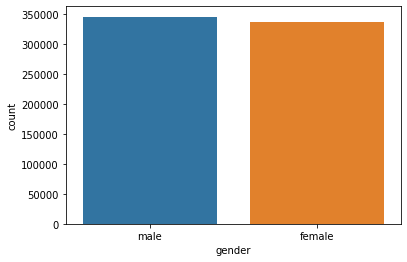

In [11]:
sns.countplot(blogtext_df['gender'])

**Proportionally male and female ration is almost similar**

In [12]:
#Value count for topic column
blogtext_df['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

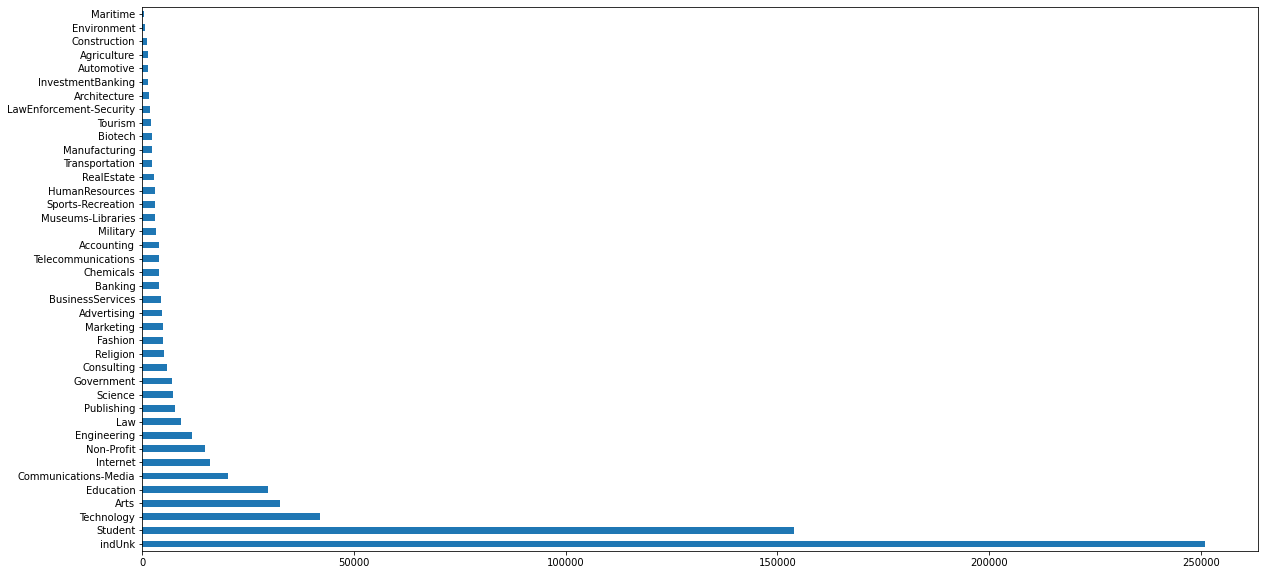

In [13]:
blogtext_df['topic'].value_counts().plot(kind='barh',figsize=(20,10))

**Most popular topic is indUnk and the least popular topic is Maritime**

In [14]:
#Value count for zodiac sign column
blogtext_df['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

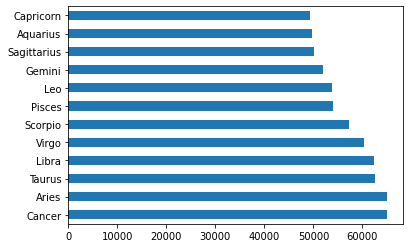

In [15]:
blogtext_df['sign'].value_counts().plot(kind='barh')

**Most of the people in dataset are of Cancer Zodiac sign and least no. of people are of Capricorn**

###Columns like ID and date are removed from the dateset as they do not provide much value

In [16]:
# Droping id and date colum
blogtext_df.drop(['id','date'], axis=1, inplace=True)

In [17]:
blogtext_df.head(2)

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...


# 2. Perform data pre-processing on the data: • Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase. • Target/label merger and transformation • Train and test split • Vectorisation, etc.

###Data cleansing by removing unwanted characters

In [18]:
blogtext_df['clean_data']=blogtext_df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

###Convert text to lowercase.

In [19]:
blogtext_df['clean_data']=blogtext_df['clean_data'].apply(lambda x: x.lower())

###Remove spaces at the beginning and at the end of the string

In [20]:
blogtext_df['clean_data']=blogtext_df['clean_data'].apply(lambda x: x.strip())

### Remove all stop words

In [21]:
# Importing stopwords library 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [23]:
blogtext_df['clean_data']=blogtext_df['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

###Checking a record in clean_data

In [24]:
# top 5 cleaned text in clean_data
blogtext_df['clean_data'][:5]

0    info found pages mb pdf files wait untill team...
1    team members drewes van der laag urllink mail ...
2    het kader van kernfusie op aarde maak je eigen...
3                                      testing testing
4    thanks yahoo toolbar capture urls popups means...
Name: clean_data, dtype: object

### Target/label merger and transformation

In [25]:
#Merging the ['gender','sign'] columns to a single multilabel column "labels"
blogtext_df['labels']=blogtext_df.apply(lambda col: [col['gender'],col['sign']], axis=1)

In [26]:
blogtext_df.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, Aquarius]"


In [27]:
#Creating a new dataframe "data" with just clean_data and labels
data=blogtext_df[['clean_data','labels']]

In [28]:
data.shape

(681284, 2)

In [29]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, Leo]"
3,testing testing,"[male, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, Aquarius]"


# 3.Design, train, tune and test the best text classifier.

### Splitting the data into X and Y

In [30]:
X=data['clean_data']

In [31]:
Y=data['labels']

### Splitting the data into 50% Train set :50% Test set 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5)

### Find 3 most popular tags and 3 most popular words in the train data.

In [34]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}

for sentence in X_train:
    for word in sentence.split():
        if word in words_counts:
            words_counts[word] += 1
        else:
            words_counts[word] = 1

for tags in y_train:
    for tag in tags:
        if tag in tags_counts:
            tags_counts[tag] += 1
        else:
            tags_counts[tag] = 1

print(sorted(words_counts, key=words_counts.get, reverse=True)[:3])

['like', 'nbsp', 'one']


In [35]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

In [36]:
print(most_common_tags)

[('male', 172602), ('female', 168040), ('Cancer', 32447)]


In [37]:
print(most_common_words)

[('like', 281956), ('nbsp', 247594), ('one', 231761)]


### Bag of Words


In [38]:
DICT_SIZE = 6000
INDEX_TO_WORDS = sorted(words_counts, key=words_counts.get, reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {word:i for i, word in enumerate(INDEX_TO_WORDS)}
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    
    for word in text.split():
        if word in words_to_index:
            result_vector[words_to_index[word]] += 1
    return result_vector

In [39]:
from scipy import sparse as sp_sparse

In [40]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (340642, 6000)
X_test shape  (340642, 6000)


### TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
def tfidf_features(X_train,  X_test):
    """
        X_train,  X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(2,2),stop_words='english') ####### YOUR CODE HERE #######
    
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_

In [46]:
X_train_tfidf,  X_test_tfidf, tfidf_vocab = tfidf_features(X_train,  X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

### Classification
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose it is convenient to use [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) from *sklearn*.

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer

In [48]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.fit_transform(y_test)

Implement the function *train_classifier* for training a classifier. In this task we suggest to use One-vs-Rest approach, which is implemented in [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) class. In this approach *k* classifiers (= number of tags) are trained. As a basic classifier, use [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time, because a number of classifiers to train is large.

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [50]:
def train_classifier(X_train, y_train, penalty='l1', C=1):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
    
    clf = LogisticRegression(solver='lbfgs')
    clf = OneVsRestClassifier(clf)
    clf.fit(X_train, y_train)
    
    return clf

Train the classifiers for different data transformations: *bag-of-words* and *tf-idf*.

In [51]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

Now you can create predictions for the data. You will need two types of predictions: labels and scores.

In [52]:
y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)

y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

Now take a look at how classifier, which uses TF-IDF, works for a few examples:

In [53]:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_inversed = mlb.inverse_transform(y_test)

Now, we would need to compare the results of different predictions, e.g. to see whether TF-IDF transformation helps or to try different regularization techniques in logistic regression. For all these experiments, we need to setup evaluation procedure. 

#4. Display and explain detail the classification report

## Evaluation 

To evaluate the results we will use several classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

 
Make sure you are familiar with all of them. How would you expect the things work for the multi-label scenario? Read about micro/macro/weighted averaging following the sklearn links provided above.

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

Implement the function *print_evaluation_scores* which calculates and prints to stdout:
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [55]:
def print_evaluation_scores(y_test, predicted):
    print('Accuracy score: ', accuracy_score(y_test, predicted))
    print('F1 score: ', f1_score(y_test, predicted, average='weighted'))
    print('Average precision score: ', average_precision_score(y_test, predicted, average='macro'))

In [57]:
print('Bag-of-words')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Bag-of-words
Accuracy score:  0.013001919904180929
F1 score:  0.3449020913939492
Average precision score:  0.16249717277601952
Tfidf
Accuracy score:  0.01695915359820574
F1 score:  0.3450582417525583
Average precision score:  0.16974160233739172


**We can see the scores for both the classifiers implementing bagofwords and tfidf are very bad. We will try to improve this by implementing CountVectorizer and check the performance later.**

#5. Print the true vs predicted labels for any 5 entries from the dataset.

In [58]:
y_test[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [59]:
y_test_predicted_labels_mybag[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [60]:
y_test_predicted_labels_tfidf[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

**We can see the difference in the outputs of true vs predicted labels for mybags and tfidf. We can see there are some similarity in the prediction of tfidf and bagofwords methods as there performance scores are also similar**

# Trying to improve model performance using Count Vectorizer 

### Merging all the other columns into labels columns

In [61]:
blogtext_df['labels']=blogtext_df.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [62]:
blogtext_df.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [63]:
data=blogtext_df[['clean_data','labels']]

In [64]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


### Splitting the data into X and Y

In [65]:
X=data['clean_data']

In [66]:
Y=data['labels']

### Lets perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [ ]:
X=vectorizer.fit_transform(X)

In [ ]:
X[1]

<1x643302 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

#### Let us see some feature names

In [ ]:
vectorizer.get_feature_names()[:5]

['aa', 'aa amazing', 'aa anger', 'aa compared', 'aa keeps']

In [ ]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [ ]:
label_counts

{'male': 5916,
 '15': 602,
 'Student': 1137,
 'Leo': 301,
 '33': 136,
 'InvestmentBanking': 70,
 'Aquarius': 571,
 'female': 4084,
 '14': 212,
 'indUnk': 3287,
 'Aries': 4198,
 '25': 386,
 'Capricorn': 215,
 '17': 1185,
 'Gemini': 150,
 '23': 253,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 '37': 33,
 'Sagittarius': 1097,
 '26': 234,
 '24': 655,
 'Scorpio': 971,
 '27': 1054,
 'Education': 270,
 '45': 16,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 '34': 553,
 '41': 20,
 'Communications-Media': 99,
 'BusinessServices': 91,
 'Sports-Recreation': 80,
 'Virgo': 236,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 454,
 '44': 3,
 '16': 440,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 79,
 '35': 2315,
 'Technology': 2654,
 '36': 1708,
 'Law': 11,
 '46': 7,
 'Consulting': 21,
 'Automotive': 14,
 '42': 14,
 'Religion': 9,
 '13': 42,
 'Fashion': 1622,
 '38': 46,
 '43': 6,
 'Publishing': 4,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanReso

### Pre-processing the labels

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
Y=binarizer.fit_transform(data.labels)

### Splitting the data into 80% Train set :20% Test set 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs')

In [ ]:
model=OneVsRestClassifier(model)

In [ ]:
model.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
Ypred=model.predict(Xtest)

In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(Ytest)

In [ ]:
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        Xtest[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 593438)	1
  (0, 86771)	1
  (0, 113776)	1
  (0, 632385)	1
  (0, 139077)	1
  (0, 567161)	1
  (0, 215891)	1
  (0, 465207)	1
  (0, 390349)	1
  (0, 625081)	1
  (0, 310781)	1
  (0, 184322)	1
  (0, 179224)	1
  (0, 552721)	1
  (0, 225428)	1
  (0, 12315)	1
  (0, 85227)	1
  (0, 626721)	1
  (0, 171859)	1
  (0, 173148)	1
  (0, 130622)	1
  (0, 264020)	1
  (0, 285158)	1
  (0, 511399)	1
  (0, 638750)	1
  :	:
  (0, 539185)	1
  (0, 439239)	1
  (0, 626932)	1
  (0, 511429)	1
  (0, 405379)	1
  (0, 99396)	1
  (0, 480858)	1
  (0, 307453)	1
  (0, 264052)	1
  (0, 130759)	1
  (0, 338547)	1
  (0, 455479)	1
  (0, 353316)	1
  (0, 4891)	1
  (0, 468181)	1
  (0, 294453)	1
  (0, 184656)	1
  (0, 329487)	1
  (0, 246374)	1
  (0, 173651)	1
  (0, 588946)	1
  (0, 590908)	1
  (0, 158216)	1
  (0, 101494)	1
  (0, 179233)	1
True labels:	35,Aries,Technology,male
Predicted labels:	Aries,male


Text:	  (0, 209373)	1
  (0, 292535)	1
  (0, 86771)	1
  (0, 450189)	1
  (0, 529247)	1
  (0, 334172)	1
  (0, 332005)	1
  (0, 16

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))

In [ ]:
print_evaluation_scores(Ytest, Ypred)

Accuracy score:  0.317
F1 score:  0.6361645904114761
Average precision score:  0.4525928250119161
Average recall score:  0.526625


**We can see there is a very good jump in the scores using CountVectorizer.**